In [11]:
from sklearn.datasets import make_blobs

# Create dataset with 3 random cluster centers and 1000 datapoints
x, y = make_blobs(n_samples = 1000, centers = 3, n_features=2, shuffle=True, random_state=31)

In [12]:
print(x)

[[-4.10785368  7.82699681]
 [-5.66810193 -8.43336082]
 [-3.991989    9.4237974 ]
 ...
 [-4.34556376 10.08902531]
 [-4.18541548 10.94587087]
 [-6.60092444 -6.81458897]]


In [13]:
print(y)

[0 2 0 2 2 0 1 0 0 1 0 2 1 2 2 2 1 0 0 0 2 1 1 2 2 2 0 1 1 0 0 0 1 2 0 0 1
 0 2 2 0 0 2 0 1 2 0 1 0 1 2 1 0 1 0 1 0 0 2 0 2 0 1 0 1 1 2 2 0 1 0 2 0 2
 1 0 1 2 2 1 2 2 1 0 0 1 2 0 2 2 1 2 1 1 2 0 2 0 1 0 2 0 1 0 0 1 1 1 1 1 0
 2 1 1 0 0 2 2 2 0 1 1 2 1 1 1 1 0 1 2 1 2 1 0 2 2 2 1 0 2 1 2 1 1 0 0 1 2
 0 2 0 1 2 1 1 1 1 0 2 0 1 2 1 2 0 1 2 1 0 2 0 0 0 1 0 1 2 0 2 2 2 2 1 2 2
 2 0 1 1 2 1 2 0 0 0 1 2 2 1 1 0 1 2 0 0 0 1 1 0 0 1 2 1 1 1 0 2 1 2 1 2 1
 1 1 0 0 2 2 1 1 1 1 1 0 0 1 0 1 1 2 2 2 2 2 1 2 0 1 1 2 1 2 2 0 0 0 1 2 0
 2 2 2 1 0 2 2 0 2 0 1 1 2 0 1 2 0 2 1 0 0 1 1 2 1 0 0 0 1 2 2 1 0 2 0 0 1
 1 2 1 0 0 0 2 2 2 0 2 1 0 2 1 1 0 2 0 0 0 0 0 2 2 0 1 2 2 1 1 2 2 0 1 1 0
 0 0 1 0 2 1 2 2 1 1 0 1 2 2 1 2 2 1 0 2 0 1 2 1 1 0 1 0 0 1 1 1 1 2 0 2 2
 2 1 2 1 1 0 1 0 0 1 0 0 1 2 0 0 0 1 1 0 1 2 2 1 1 1 0 2 0 2 0 2 2 0 0 2 2
 0 2 1 0 2 0 2 0 1 0 1 1 0 0 2 1 2 0 1 0 0 2 2 1 1 2 2 1 0 2 1 2 0 0 1 0 1
 2 2 0 1 2 1 0 1 0 0 2 0 2 1 0 0 2 2 0 1 1 1 1 0 1 0 0 2 2 1 2 1 1 0 2 0 1
 2 1 1 0 1 1 1 1 2 1 1 1 

In [16]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      for j in range(len(curr_center)):
        curr_sse += (points[i, j] - curr_center[j]) ** 2

    sse.append(curr_sse)
  return sse

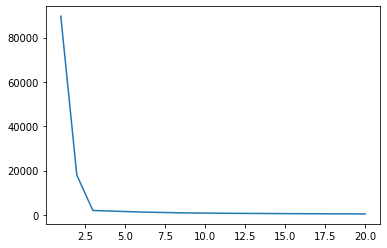

In [24]:
import matplotlib.pyplot as plt
import numpy as np

kmax=20
xpoints = np.array(range(1,kmax+1))
sse=calculate_WSS(x,kmax)

plt.plot(xpoints, sse)
plt.show()
